In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib


from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.compose import make_column_transformer  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [63]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [64]:
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [65]:
df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

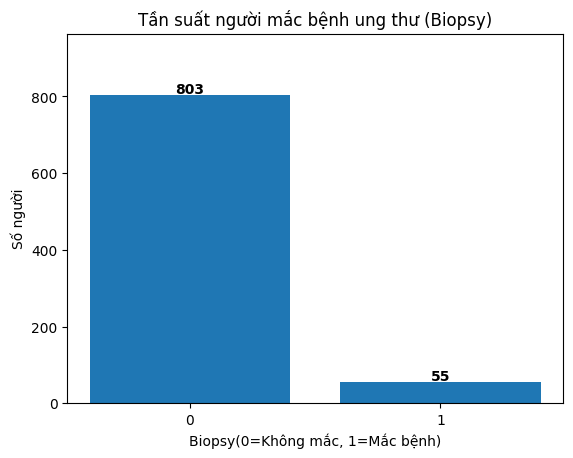

In [67]:

counts = df['Biopsy'].value_counts().sort_index()

# T·∫°o bi·ªÉu ƒë·ªì c·ªôt
plt.bar(counts.index, counts.values)
plt.xlabel('Biopsy(0=Kh√¥ng m·∫Øc, 1=M·∫Øc b·ªánh)')
plt.ylabel('S·ªë ng∆∞·ªùi')
plt.title('T·∫ßn su·∫•t ng∆∞·ªùi m·∫Øc b·ªánh ung th∆∞ (Biopsy)')
plt.xticks([0, 1])
for i, v in enumerate(counts.values):
    plt.text(counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

plt.ylim(0, max(counts.values)*1.2)  # TƒÉng kho·∫£ng c√°ch tr·ª•c y cho ch·ªØ s·ªë d·ªÖ nh√¨n
plt.show()

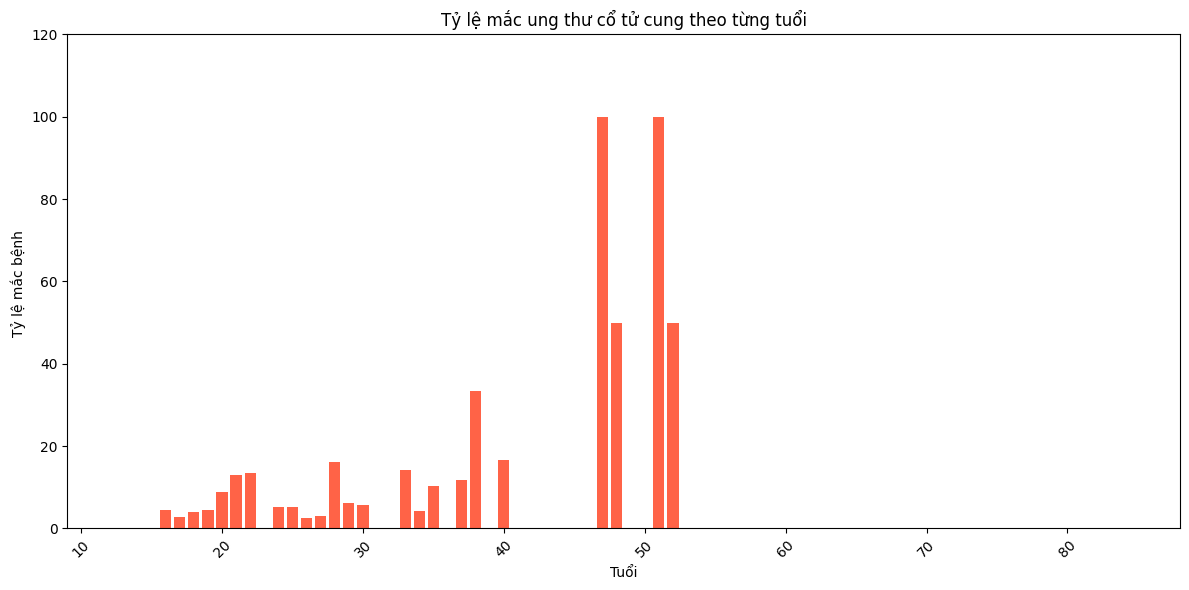

In [68]:
# T·ªïng s·ªë ng∆∞·ªùi theo tu·ªïi
total_by_age = df['Age'].value_counts().sort_index()

# S·ªë ng∆∞·ªùi m·∫Øc b·ªánh theo tu·ªïi
biopsy_by_age = df[df['Biopsy'] == 1]['Age'].value_counts().sort_index()

# T√≠nh t·ª∑ l·ªá m·∫Øc b·ªánh theo tu·ªïi
risk_rate = (biopsy_by_age / total_by_age).fillna(0)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12,6))
plt.bar(risk_rate.index, risk_rate.values * 100, color='tomato')
plt.xlabel('Tu·ªïi')
plt.ylabel('T·ª∑ l·ªá m·∫Øc b·ªánh ')
plt.title('T·ª∑ l·ªá m·∫Øc ung th∆∞ c·ªï t·ª≠ cung theo t·ª´ng tu·ªïi')
plt.xticks(rotation=45)

# Ghi ph·∫ßn trƒÉm l√™n c·ªôt


plt.ylim(0, max(risk_rate.values)*100 * 1.2)
plt.tight_layout()
plt.show()



C:\Users\ngwxa\AppData\Local\Temp\ipykernel_848\3692250577.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('smoke_bin')['Biopsy'].mean() * 100  # d·∫°ng %


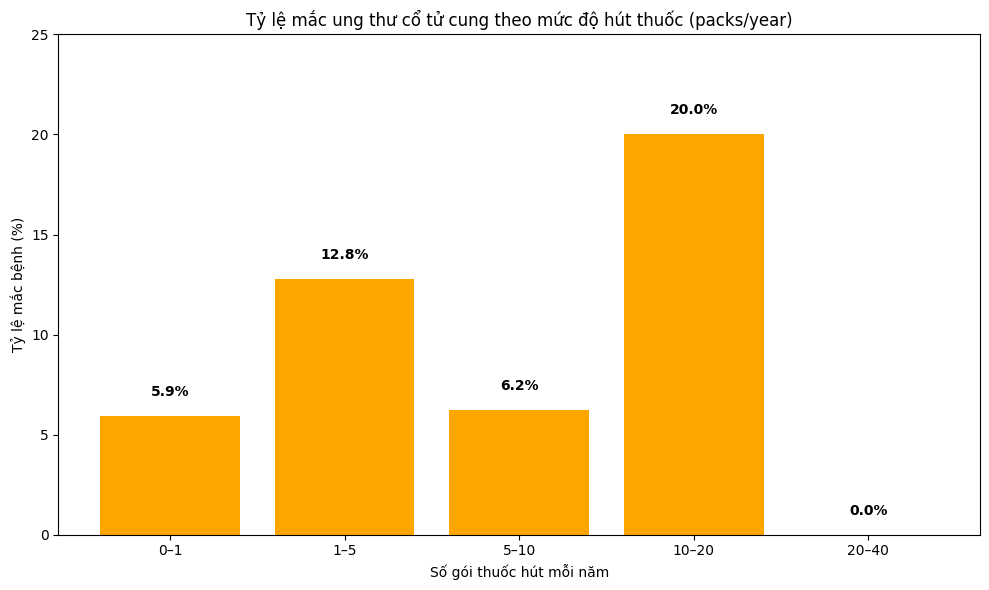

In [69]:
# Chuy·ªÉn c·ªôt v·ªÅ s·ªë n·∫øu ch∆∞a
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'], errors='coerce')
df['Biopsy'] = pd.to_numeric(df['Biopsy'], errors='coerce')

# B·ªè NaN
df_temp = df[['Smokes (packs/year)', 'Biopsy']].dropna()

# Chia th√†nh c√°c nh√≥m (bins) theo m·ª©c ƒë·ªô h√∫t thu·ªëc
bins = [0, 1, 5, 10, 20, 40, 100]  # Tu·ª≥ ch·ªçn
labels = ['0‚Äì1', '1‚Äì5', '5‚Äì10', '10‚Äì20', '20‚Äì40', '40+']
df_temp['smoke_bin'] = pd.cut(df_temp['Smokes (packs/year)'], bins=bins, labels=labels, right=False)

# T√≠nh t·ª∑ l·ªá m·∫Øc b·ªánh trong m·ªói nh√≥m
grouped = df_temp.groupby('smoke_bin')['Biopsy'].mean() * 100  # d·∫°ng %

# V·∫Ω bi·ªÉu ƒë·ªì
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(grouped.index.astype(str), grouped.values, color='orange')
plt.xlabel('S·ªë g√≥i thu·ªëc h√∫t m·ªói nƒÉm')
plt.ylabel('T·ª∑ l·ªá m·∫Øc b·ªánh (%)')
plt.title('T·ª∑ l·ªá m·∫Øc ung th∆∞ c·ªï t·ª≠ cung theo m·ª©c ƒë·ªô h√∫t thu·ªëc (packs/year)')

# Ghi s·ªë
for i, val in enumerate(grouped.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, max(grouped.values)*1.25)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Bi·ªÉu ƒë·ªì d·ªØ li·ªáu thi·∫øu ban ƒë·∫ßu')

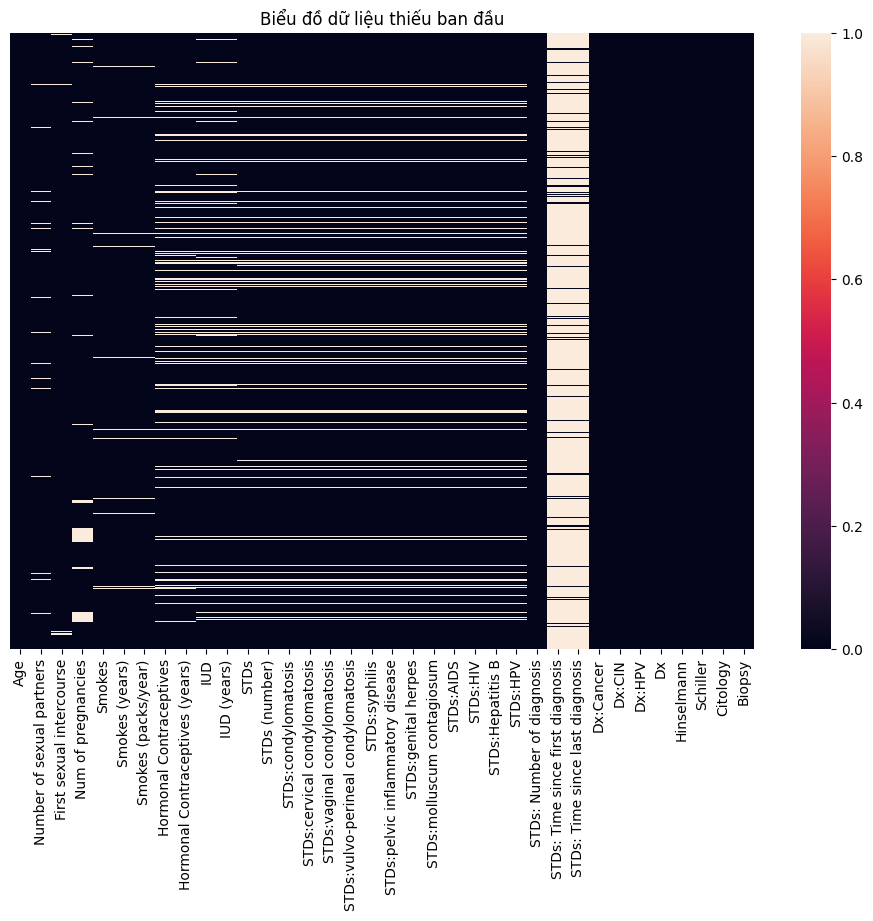

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load l·∫°i d·ªØ li·ªáu g·ªëc
df_raw = pd.read_csv("risk_factors_cervical_cancer.csv")  # ho·∫∑c t√™n file g·ªëc c·ªßa b·∫°n


# Thay th·∫ø d·∫•u '?' th√†nh NaN n·∫øu c√≥
df_raw.replace('?', pd.NA, inplace=True)

# V·∫Ω heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.isnull(), yticklabels=False)
plt.title("Bi·ªÉu ƒë·ªì d·ªØ li·ªáu thi·∫øu ban ƒë·∫ßu")

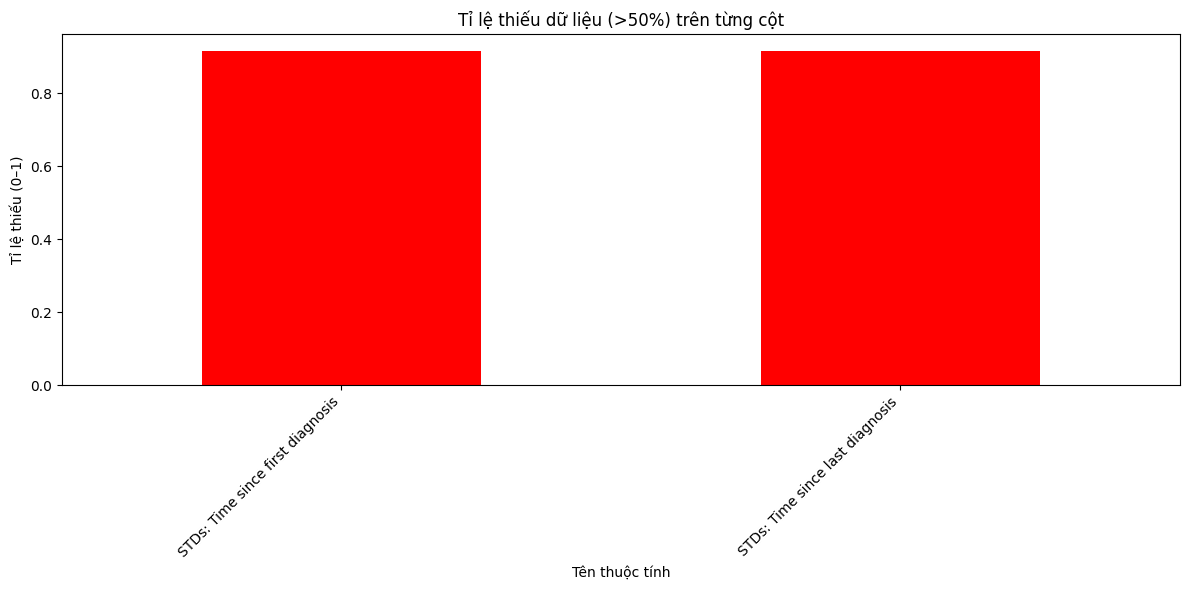

C:\Users\ngwxa\AppData\Local\Temp\ipykernel_848\2121869920.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\ngwxa\AppData\Local\Temp\ipykernel_848\2121869920.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

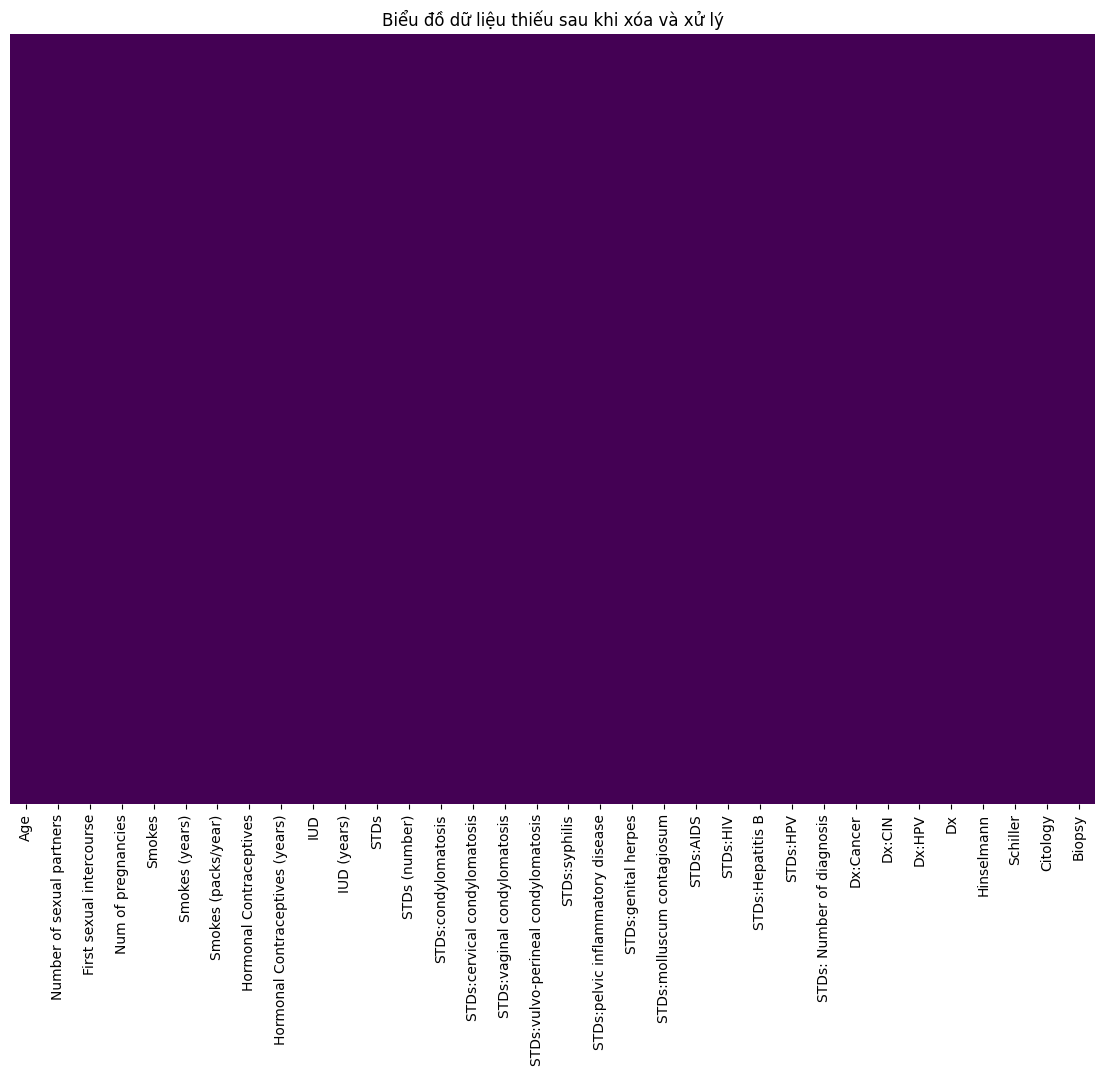

In [71]:


# 1. ƒê·ªçc d·ªØ li·ªáu v√† thay '?' b·∫±ng NaN
df = pd.read_csv("risk_factors_cervical_cancer.csv")
df.replace('?', pd.NA, inplace=True)

# 2. Chuy·ªÉn to√†n b·ªô c·ªôt v·ªÅ s·ªë, c√°c gi√° tr·ªã kh√¥ng chuy·ªÉn ƒë∆∞·ª£c s·∫Ω th√†nh NaN
df = df.apply(pd.to_numeric, errors='coerce')

# 3. T√≠nh t·ª∑ l·ªá d·ªØ li·ªáu b·ªã thi·∫øu tr√™n m·ªói c·ªôt
missing_ratio = df.isnull().mean()

# L·ªçc v√† l·∫•y t·ªâ l·ªá thi·∫øu c·ªßa c√°c c·ªôt > 50%
missing_over_50 = missing_ratio[missing_ratio > 0.5]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12,6))
missing_over_50.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title("T·ªâ l·ªá thi·∫øu d·ªØ li·ªáu (>50%) tr√™n t·ª´ng c·ªôt")
plt.ylabel("T·ªâ l·ªá thi·∫øu (0‚Äì1)")
plt.xlabel("T√™n thu·ªôc t√≠nh")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# 5. X√≥a c√°c c·ªôt ƒë√≥
# 5. X√≥a c√°c c·ªôt ƒë√≥
df.drop(columns=missing_over_50.index, inplace=True)


# 6. ƒêi·ªÅn ph·∫ßn c√≤n l·∫°i:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        # N·∫øu s·ªë l∆∞·ª£ng gi√° tr·ªã duy nh·∫•t nh·ªè (v√≠ d·ª• <= 10), coi nh∆∞ r·ªùi r·∫°c
        if df[col].nunique() <= 1:
            # ƒêi·ªÅn b·∫±ng mode
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
        else:
            # ƒêi·ªÅn b·∫±ng trung b√¨nh
            df[col].fillna(df[col].mean(), inplace=True)

# 7. V·∫Ω heatmap ƒë·ªÉ x√°c nh·∫≠n
plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Bi·ªÉu ƒë·ªì d·ªØ li·ªáu thi·∫øu sau khi x√≥a v√† x·ª≠ l√Ω")
plt.show()


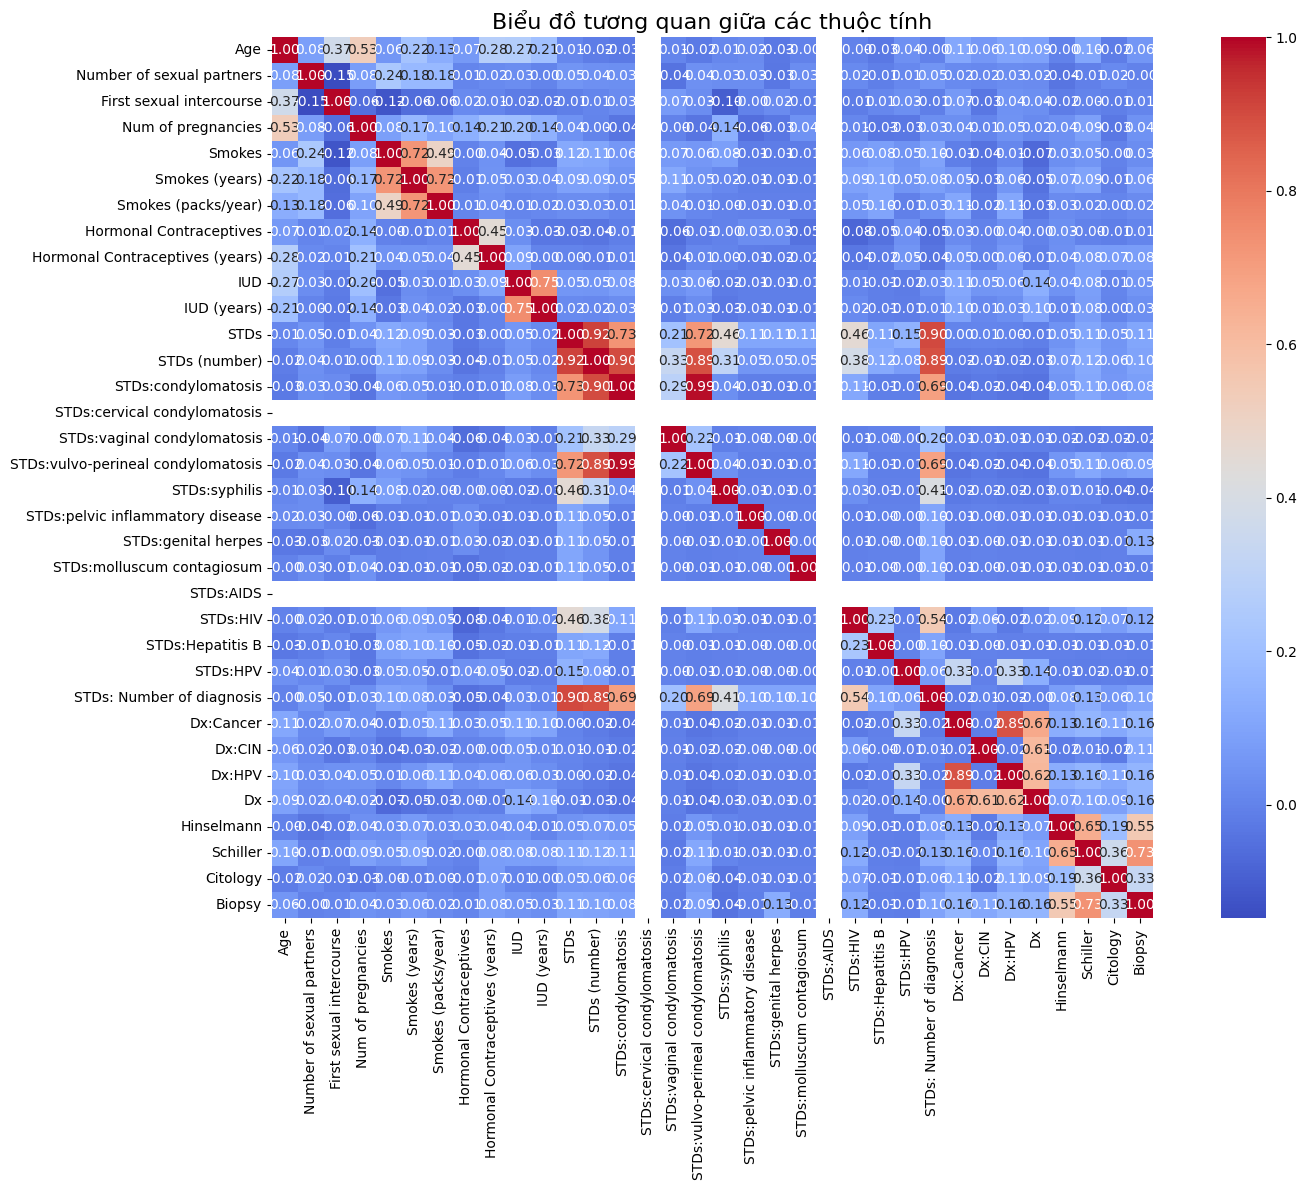

In [72]:
# 1. T√≠nh ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c thu·ªôc t√≠nh
correlation_matrix = df.corr()

# 2. V·∫Ω heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

plt.title("Bi·ªÉu ƒë·ªì t∆∞∆°ng quan gi·ªØa c√°c thu·ªôc t√≠nh", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:



# üîÑ C·∫≠p nh·∫≠t l·∫°i X v√† y sau khi df ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']


In [74]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # ƒë·ªÉ th·∫•y t·ªâ l·ªá %

Biopsy
0    803
1     55
Name: count, dtype: int64
Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64


In [75]:
from sklearn.compose import make_column_transformer

# X ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a th√†nh DataFrame s·ªë, nh∆∞ng c√≥ th·ªÉ ch·ª©a NaN
binary_cols = []
for col in X.columns:
    unique_vals = X[col].dropna().unique()
    if set(unique_vals).issubset({0, 1}):  # ch·ªâ g·ªìm 0 v√† 1
        binary_cols.append(col)

# C√≤n l·∫°i l√† numerical
numerical_cols = [col for col in X.columns if col not in binary_cols]




X_imputed = X.copy()


# ‚úÖ N·∫øu c·∫ßn, b·∫°n c√≥ th·ªÉ bi·∫øn l·∫°i th√†nh DataFrame v·ªõi c·ªôt ƒë√∫ng:
X_imputed = pd.DataFrame(X_imputed, columns=numerical_cols + binary_cols)


joblib.dump(X_imputed.columns.tolist(), 'model_features.pkl')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
# B∆∞·ªõc 2: C√¢n b·∫±ng d·ªØ li·ªáu v·ªõi SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Ki·ªÉm tra l·∫°i
print("‚úÖ Nh√£n sau khi SMOTE:")
print(y_resampled.value_counts())


‚úÖ Nh√£n sau khi SMOTE:
Biopsy
0    803
1    803
Name: count, dtype: int64


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, random_state=42, stratify=y_resampled
)

In [77]:
df.head()

Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                   15.0000   
1   15                        1.0                   14.0000   
2   34                        1.0                   16.9953   
3   52                        5.0                   16.0000   
4   46                        3.0                   21.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   

   STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
0       0.0                          0          0       0       0   0   
1       0.0                          0          0       0       0   0   
2       0.0                          0          0       0       0   0   
3       0.0                          0          1       0       1   0   
4       0.0                          0          0       0       0   0   

   Hinselmann  Schiller  Citology  Biopsy  
0           0         0         0       0  
1           0         0         0       0  
2           0         0         0       0  
3           0         0         0       0  
4           0         0         0       0  

[5 rows x 34 columns]

In [78]:
df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.642267                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.399325    0.350189        4.057885             2.209657   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               858.000000                       858.000000  858.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.448671                         3.519082    0.293260   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         1.000000    0.000000   
75%                   1.000000                         2.256419    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...    STDs:HPV  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  ...  858.000000                 858.000000  858.000000  858.000000   
mean   ...    0.002656                   0.087413    0.020979    0.010490   
std    ...    0.048244                   0.302545    0.143398    0.101939   
min    ...    0.000000                   0.000000    0.000000    0.000000   
25%    ...    0.000000                   0.000000    0.000000    0.000000   
50%    ...    0.000000                   0.000000    0.000000    0.000000   
75%    ...    0.000000                   0.000000    0.000000    0.000000   
max    ...    1.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 34 columns]

In [79]:
def evaluate_model(model, X, y, k=10):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))

    print("=== Evaluation Results ===")
    print(f"Accuracy :  {np.mean(accuracy_scores):.4f} ¬± {np.std(accuracy_scores):.4f}")
    print(f"F1-score :  {np.mean(f1_scores):.4f} ¬± {np.std(f1_scores):.4f}")
    print(f"Precision:  {np.mean(precision_scores):.4f} ¬± {np.std(precision_scores):.4f}")
    print(f"Recall   :  {np.mean(recall_scores):.4f} ¬± {np.std(recall_scores):.4f}")

    # ‚úÖ Fit l·∫°i m√¥ h√¨nh tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu
    model.fit(X, y)
    return model

    

1.  Accuracy (ƒê·ªô ch√≠nh x√°c t·ªïng th·ªÉ)
    Accuracy l√† t·ª∑ l·ªá s·ªë m·∫´u m√† m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng tr√™n t·ªïng s·ªë m·∫´u.
üìé V√≠ d·ª•: n·∫øu c√≥ 100 ng∆∞·ªùi, m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng 90 ng∆∞·ªùi ‚Üí Accuracy = 90%.

2. Precision (ƒê·ªô ch√≠nh x√°c c·ªßa d·ª± ƒëo√°n d∆∞∆°ng t√≠nh)
    Precision ƒëo l∆∞·ªùng xem trong c√°c l·∫ßn m√¥ h√¨nh d·ª± ƒëo√°n l√† ‚Äúc√≥ b·ªánh‚Äù, th√¨ bao nhi√™u ph·∫ßn trƒÉm l√† ƒë√∫ng.
üß† V√≠ d·ª•: N·∫øu m√¥ h√¨nh n√≥i 10 ng∆∞·ªùi ‚Äúc√≥ b·ªánh‚Äù m√† ch·ªâ 6 ng∆∞·ªùi th·∫≠t s·ª± m·∫Øc b·ªánh ‚Üí Precision = 0.6.

3. Recall (ƒê·ªô bao ph·ªß ca th·∫≠t s·ª± d∆∞∆°ng t√≠nh)
Recall ƒëo l∆∞·ªùng xem m√¥ h√¨nh b·∫Øt ƒë∆∞·ª£c bao nhi√™u ph·∫ßn trƒÉm s·ªë ca th·∫≠t s·ª± m·∫Øc b·ªánh.
üß† V√≠ d·ª•: C√≥ 10 ng∆∞·ªùi th·∫≠t s·ª± m·∫Øc b·ªánh, m√¥ h√¨nh ch·ªâ b·∫Øt ƒë∆∞·ª£c 6 ng∆∞·ªùi ‚Üí Recall = 0.6.
 
4. F1-score (ƒêi·ªÉm c√¢n b·∫±ng gi·ªØa Precision v√† Recall)
 F1-score l√† trung b√¨nh ƒëi·ªÅu h√≤a c·ªßa Precision v√† Recall.
N√≥ c√¢n b·∫±ng gi·ªØa vi·ªác d·ª± ƒëo√°n ƒë√∫ng ca b·ªánh v√† kh√¥ng b·ªè s√≥t ca b·ªánh.
üß† N·∫øu Precision = 1 v√† Recall = 0, th√¨ F1 = 0 (nghƒ©a l√† m·∫•t c√¢n b·∫±ng ‚Üí kh√¥ng t·ªët).

=== Evaluation Results ===
Accuracy :  0.8667 ¬± 0.0214
F1-score :  0.8526 ¬± 0.0256
Precision:  0.9483 ¬± 0.0324
Recall   :  0.7757 ¬± 0.0390


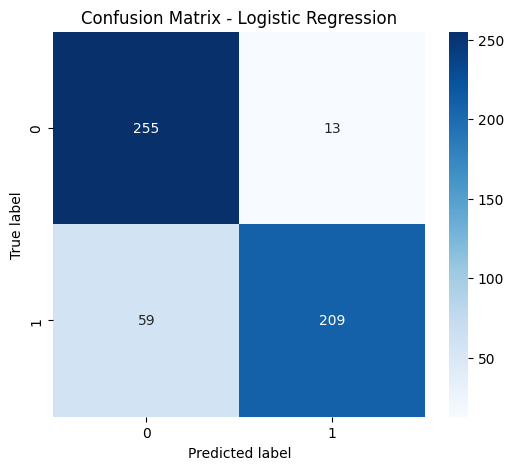

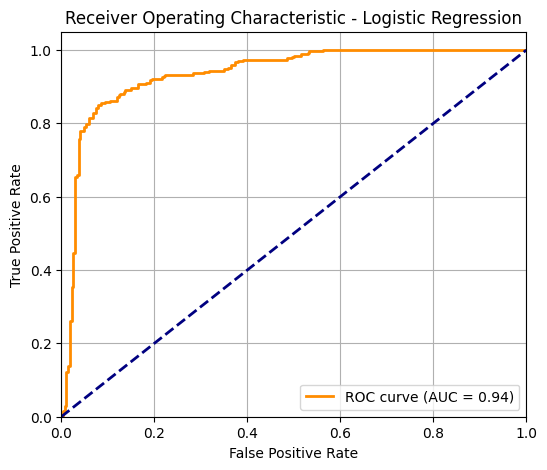

In [80]:


# 1. Kh·ªüi t·∫°o v√† ƒë√°nh gi√° m√¥ h√¨nh tr√™n d·ªØ li·ªáu ƒë√£ SMOTE
model = LogisticRegression(max_iter=1000)

# ƒê√°nh gi√° b·∫±ng K-Fold v√† fit l·∫°i tr√™n to√†n b·ªô d·ªØ li·ªáu SMOTE
model = evaluate_model(model, pd.DataFrame(X_resampled), y_resampled)



X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)

# 3. D·ª± ƒëo√°n ƒë·ªÉ tr·ª±c quan h√≥a
y_pred_cm = model.predict(X_test_cm)


# 4. V·∫Ω Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

import joblib
from sklearn.metrics import roc_curve, auc

# 5. T√≠nh x√°c su·∫•t d·ª± ƒëo√°n (predict_proba) ƒë·ªÉ v·∫Ω ROC
y_proba = model.predict_proba(X_test_cm)[:, 1]

# 6. T√≠nh c√°c gi√° tr·ªã cho ROC curve
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




=== Evaluation Results ===
Accuracy :  0.9427 ¬± 0.0170
F1-score :  0.9420 ¬± 0.0177
Precision:  0.9449 ¬± 0.0308
Recall   :  0.9400 ¬± 0.0206


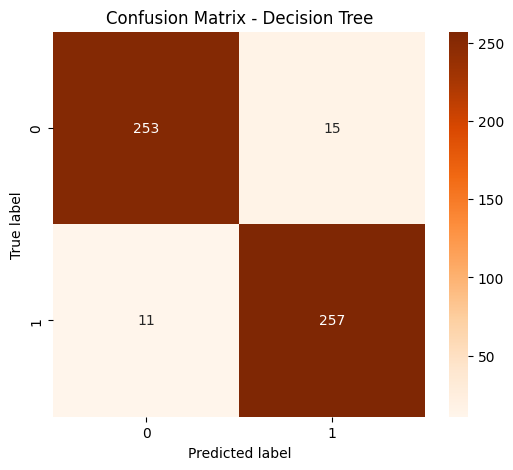

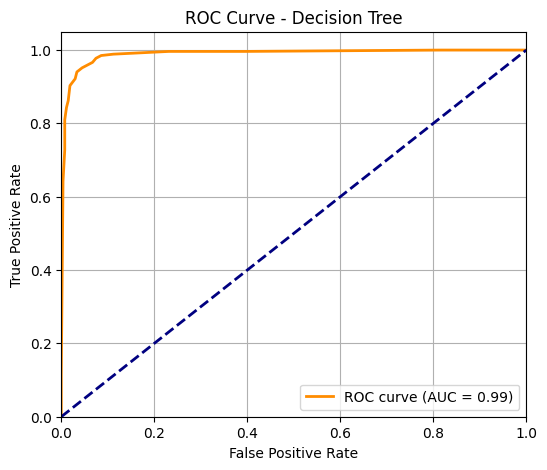

In [81]:


# 1. Kh·ªüi t·∫°o v√† ƒë√°nh gi√° m√¥ h√¨nh tr√™n d·ªØ li·ªáu ƒë√£ SMOTE
de_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)

# ƒê√°nh gi√° b·∫±ng K-Fold v√† fit l·∫°i tr√™n to√†n b·ªô d·ªØ li·ªáu SMOTE
de_model = evaluate_model(de_model, pd.DataFrame(X_resampled), y_resampled)

# 2. Chia l·∫°i d·ªØ li·ªáu ƒë·ªÉ tr·ª±c quan h√≥a (v·∫´n d√πng d·ªØ li·ªáu SMOTE)
from sklearn.model_selection import train_test_split

X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)

# 3. D·ª± ƒëo√°n ƒë·ªÉ tr·ª±c quan h√≥a
y_pred_cm = de_model.predict(X_test_cm)


# 4. V·∫Ω Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 5. L·∫•y x√°c su·∫•t d·ª± ƒëo√°n t·ª´ m√¥ h√¨nh (c·ªôt th·ª© 2 t∆∞∆°ng ·ª©ng class = 1)
y_proba = de_model.predict_proba(X_test_cm)[:, 1]

# 6. T√≠nh ROC v√† AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




=== Evaluation Results ===
Accuracy :  0.9171 ¬± 0.0273
F1-score :  0.9119 ¬± 0.0305
Precision:  0.9631 ¬± 0.0200
Recall   :  0.8673 ¬± 0.0516


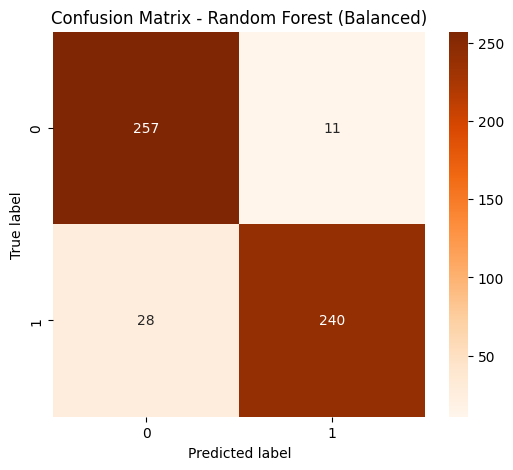

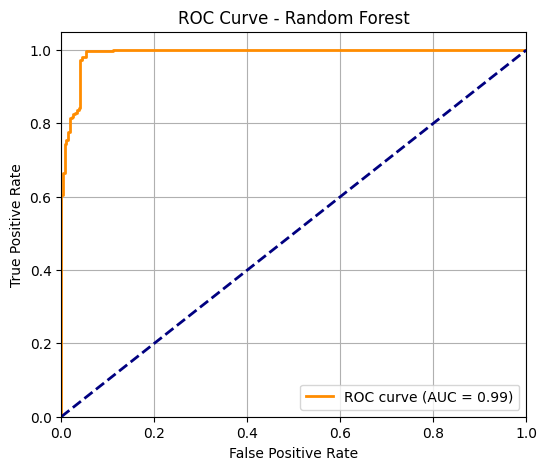

['random_forest_model.pkl']

In [82]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=10,
    min_samples_split=20,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model = evaluate_model(rf_model, pd.DataFrame(X_resampled), y_resampled)



X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)



y_pred_cm = rf_model.predict(X_test_cm)

# 4. V·∫Ω Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest (Balanced)")
plt.show()

# 5. X√°c su·∫•t d·ª± ƒëo√°n cho class 1
y_proba = rf_model.predict_proba(X_test_cm)[:, 1]

# 6. T√≠nh ROC v√† AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 8. L∆∞u m√¥ h√¨nh

joblib.dump(rf_model, 'random_forest_model.pkl')  # t√™n file gi·ªØ nguy√™n ƒë·ªÉ Flask d√πng




In [83]:
import joblib

# Sau khi ƒë√£ x·ª≠ l√Ω d·ªØ li·ªáu v√† c√≥ X_imputed
joblib.dump(X_imputed.columns.tolist(), 'model_features.pkl')
print("‚úÖ ƒê√£ t·∫°o l·∫°i model_features.pkl")


‚úÖ ƒê√£ t·∫°o l·∫°i model_features.pkl
